# Section 1: Project purpose
In this notebook I will look at some data I collected on mott's fruit gummies to see if I can answer some suspicions I had while consuming this snack during the pandemic. 

### Question 1: How often is there an extra pack in the box. 
### Question 2: What is the distributrion of number of gummies per pack
### Question 3: What is the distribution of each gummy type
### Question 4: If 2 packs are choosen, how often is it that I will get at least 2 of every gummy type

In [1]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Section 2: Data Understanding

In [2]:
#Import the data and look at the shape
import_df = pd.read_csv('Data_Retrival/data/gummy_data.csv')
import_df.shape

(71, 9)

# Section 3: Data Preparation and Evaluation

In [3]:
#This data is saved inb a google sheets page. 
#The sum category uses a formula to get the value and then is dragged down to be auto filled in later
#This is all to sayt that there are rows of data that are not data
df = import_df[import_df['sum'] != 0]
df.shape

(55, 9)

### Question 1: How often is there an extra pack in the box.

In [4]:
#Although I initially added a column to speciifcally track if the box had an extra pack
#This is actually easier to represent, for now, with value_counts on the box column
df.box.value_counts()

2.0    11
4.0    11
3.0    10
5.0    10
6.0    10
1.0     3
Name: box, dtype: int64

In [ ]:
#I started this project in the middle of a box. By this point I had been counting packs
#I know that in the first box, the 3rd pack was the 11th
#This shows that for 6 boxes, 3 of them had an extra pack!
#It'll be interesting to see if this continues with a larger sample size

### Question 2: What is the distributrion of number of gummies per pack

In [5]:
#This is another question that can easily be answered with value_counts
#I use normalize = true to get a percentage
gummies_per_pack = df['sum'].value_counts(normalize=True)
gummies_per_pack

8    0.854545
9    0.145455
Name: sum, dtype: float64

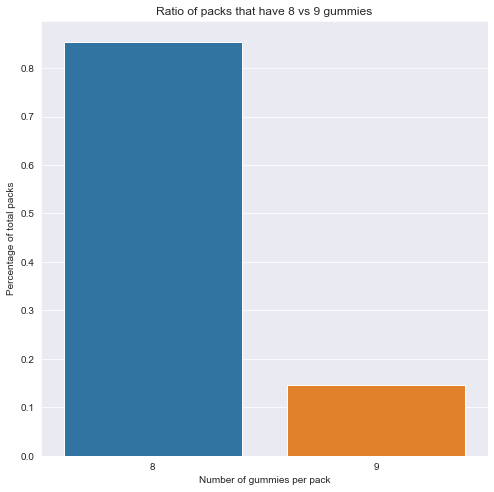

In [6]:
#8 seems to be the standar number of gummies you should recieve
#About 15% of the time I got an extra gummy! Thats a little less than 1 every 6 packs
#So far I've yet to get a pack with only 7. Knock on wood. 
plt.figure(figsize=(8,8))
sns.barplot(x=gummies_per_pack.index,y=gummies_per_pack.values);
plt.xlabel('Number of gummies per pack');
plt.ylabel('Percentage of total packs');
plt.title('Ratio of packs that have 8 vs 9 gummies');

### Question 3: What is the distribution of each gummy type

In [7]:
#For me, the berry gummy, I believe it is specifically a strawberry, is my favorite gummy
#My least favorite is the carrot. I always felt I got a lot more carrots than berries
#Lets see if my casual observation is correct
#To do this I'm going to get tthe mean distribution of all the fruit, and normalize it
fruit_lst = ['pear','carrot','grape','berry','apple']
val_counts = df[fruit_lst].apply(pd.Series.value_counts, normalize=True)
val_counts

,pear,carrot,grape,berry,apple
0.0,0.163636,0.145455,0.090909,0.218182,0.236364
1.0,0.472727,0.200000,0.218182,0.418182,0.454545
2.0,0.218182,0.309091,0.290909,0.254545,0.145455
3.0,0.090909,0.272727,0.236364,0.109091,0.127273
4.0,0.036364,0.072727,0.090909,NaN,0.036364
5.0,0.018182,NaN,0.036364,NaN,NaN
6.0,NaN,NaN,0.036364,NaN,NaN


In [8]:
#I also want to get the mean value of each gummy per pack
df_mean = df[fruit_lst].mean().reset_index(name='Mean')
df_mean.columns = ['fruit','average']
df_mean

,fruit,average
0,pear,1.418182
1,carrot,1.927273
2,grape,2.272727
3,berry,1.254545
4,apple,1.272727


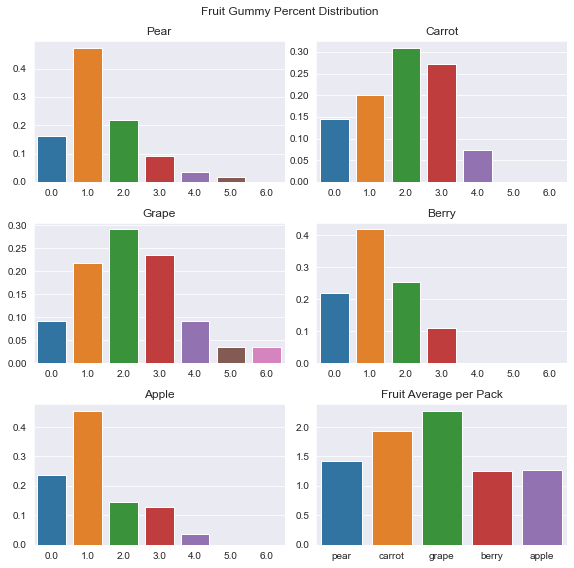

In [9]:
#Now lets see what it looks like
fig, axes = plt.subplots(3,2,figsize=(8,8))
fig.suptitle('Fruit Gummy Percent Distribution')
sns.barplot(x=val_counts.index,y=val_counts.pear,ax=axes[0,0]);
axes[0,0].set_title('Pear')
axes[0,0].set_ylabel('')
sns.barplot(x=val_counts.index,y=val_counts.carrot,ax=axes[0,1]);
axes[0,1].set_title('Carrot')
axes[0,1].set_ylabel('')
sns.barplot(x=val_counts.index,y=val_counts.grape,ax=axes[1,0]);
axes[1,0].set_title('Grape')
axes[1,0].set_ylabel('')
sns.barplot(x=val_counts.index,y=val_counts.berry,ax=axes[1,1]);
axes[1,1].set_title('Berry')
axes[1,1].set_ylabel('')
sns.barplot(x=val_counts.index,y=val_counts.apple,ax=axes[2,0]);
axes[2,0].set_title('Apple')
axes[2,0].set_ylabel('')
sns.barplot(x=df_mean.fruit,y=df_mean.average,ax=axes[2,1]);
axes[2,1].set_title('Fruit Average per Pack')
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('')
fig.tight_layout()

In [ ]:
#So, what does this all mean
#The first 5 graphs are for each individual fruit and the mean number they appear per pack, normalized
#If you expected the gummies to appear equally, you'd expect the distribution curves to be fairly equal
#This is obviously not the case
#Finally, the last graph confirms my suspicions. Berry is the least represented gummy of the 5
#Carrot is not the most common, but it is second. 
#After seeing this I do remember getting a lot of grapes. But i don't mind the grapes so it was ok.

### Question 4: If 2 packs are choosen, how often is it that I will get at least 2 of every gummy type

In [ ]:
#I thought this problem would be rather difficult to answer and took quite a bit of googling
#I eventually stumbled upon a stackoverflow page I could modify to my needs.
#https://stackoverflow.com/questions/47239332/take-the-sum-of-every-n-rows-in-a-pandas-series

In [10]:
#First I want to get ride of all the third packs as that goes against the spirit of the question
inter_df = df[df['3rd pack'] != True]
#Reseting the index since some are now missing
eat_df = inter_df[fruit_lst].reset_index(drop=True)
#This is the secret sauce to sum up every 2 rows. It's actually pretty elegant. 
gf = eat_df.groupby(eat_df.index // 2).sum()
#Create a column that is the logical test if I have at least 2 of every fruit
gf['test'] = np.where(((gf.pear>=2)&(gf.carrot>=2)&(gf.grape>=2)&(gf.berry>=2)&(gf.apple>=2)), 'Yes', 'No')
#Finally, a value_counts() to see how often I was able to do this
follow_up = gf.test.value_counts()
follow_up

No     15
Yes    11
Name: test, dtype: int64

In [ ]:
#That is a fairly even split but I'm left dissapointed more often than not. 